In [63]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
import os, pickle

from utils import config, DataGenerator, visualization

In [44]:
model = load_model(f"trained_models/{config.TRAINED_MODEL_DIR}/trained-iou62.h5")
# model = load_model(f"trained_models/trained-acc78-lr0.001-flt_num-64.h5")


In [64]:
with open(f"trained_models/{config.TRAINED_MODEL_DIR}/training-history.pkl", 'rb') as file:
    training = pickle.load(file)

In [69]:
def display_learning_curves(history):
    acc = history.history["acc"]
    val_acc = history.history["val_acc"]

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs_range = range(len(acc))

    fig = plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label="train accuracy")
    plt.plot(epochs_range, val_acc, label="validataion accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label="train loss")
    plt.plot(epochs_range, val_loss, label="validataion loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")

    fig.tight_layout()
    plt.show()

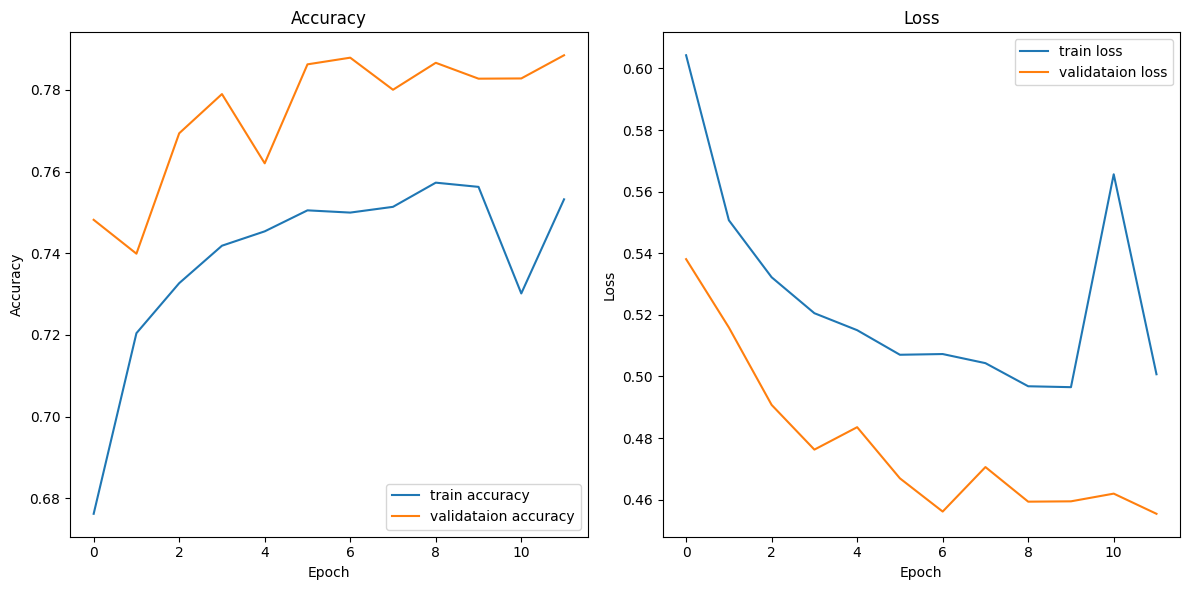

In [70]:
display_learning_curves(training)

In [45]:
batch_size = 64

In [49]:
def load_data():
    masks_dir = os.path.join(config.DATASET_DIR, "masks")
    images_dir = os.path.join(config.DATASET_DIR, "images")

    data_gen = DataGenerator.DataGenerator(images_dir, masks_dir)
    return data_gen

In [50]:
data_gen = load_data()


test_batches = data_gen.test_dataset.cache().batch(batch_size)
test_batches = test_batches.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

Found 5108 images.
4086 of them are in train set, and the rest 1022 are in the test set.
Default preprocessing mapped (resizing, loading)


2/2 [==============================] - 0s 86ms/step


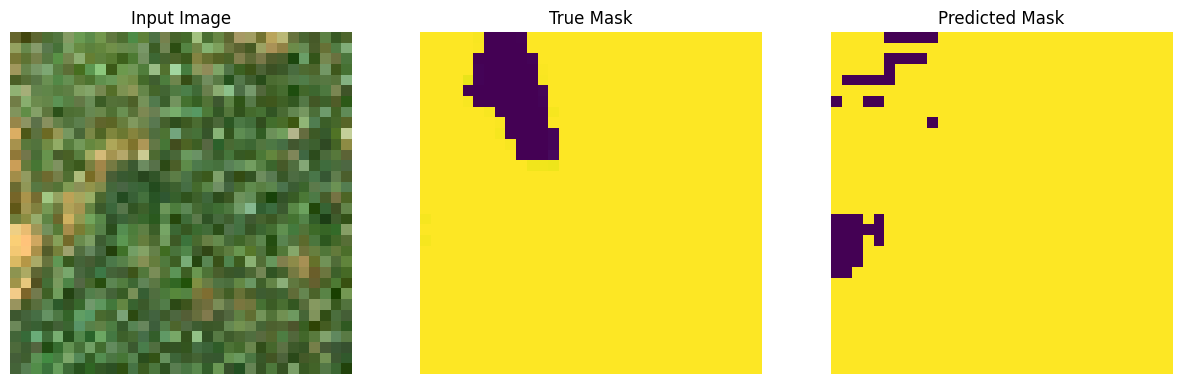

In [59]:
index = np.random.randint(batch_size)
sample_batch = next(iter(test_batches))

sample_mask = sample_batch[1][index]
sample_image = sample_batch[0][index]

y_pred = model.predict(sample_batch[0])
pred_mask = (y_pred[index] > 0.5).astype(int)

visualization.display([sample_image, sample_mask, pred_mask])